In [12]:
cd("D:\\NUS_differential_equation\\SOLOW_eqn_final_training\\")

In [13]:
include(".\\addition\\Addition_Methods.jl")
training_1= CSV.read("Eqn1.csv")

,Albania,Argentina,Armenia,Australia,Azerbaijan,Bahrain,Bangladesh
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.315385,-0.365085,-0.129759,-0.0386792,0.123116,0.16721,-0.379107
2,0.480738,0.401279,0.209248,0.00304851,-0.117758,-0.0779962,-0.0239767
3,-0.155378,0.193359,-0.285671,-0.0950609,-0.376659,-0.304799,0.305403
4,-0.524337,-0.49849,-0.392856,-0.371067,0.104213,0.460908,-0.466064
5,0.496397,0.312354,-0.148035,0.427938,0.364014,0.337904,0.297171
6,0.0684203,-0.10623,-0.471297,-0.0863382,-0.499476,0.13334,0.0806113
7,-0.0819718,0.407028,-0.226086,-0.223112,-0.110896,-0.109254,-0.138837
8,0.292213,-0.354993,0.224698,-0.274763,0.414215,0.164845,0.223585
9,-0.482882,-0.326609,-0.228513,0.0923917,0.217039,-0.154773,0.110989


In [34]:
country1= "Albania" # loss didnot converge as well well
country2= "Australia" # Loss converge very well 
country3= "Philippines" # loss converge badly at equation 2
ann = FastChain(FastDense(1, 20, tanh),FastDense(20, 20, tanh),
                FastDense(20, 1))
nnp = initial_params(ann)

481-element Array{Float32,1}:
  0.51442593
  0.02927745
 -0.048576083
  0.3329124
  0.29151678
  0.22926626
  0.13887095
  0.527192
  0.054800384
  0.2944382
  0.30015403
 -0.22010395
 -0.035168238
  ⋮
  0.0946783
 -0.49826258
  0.13209955
 -0.35831845
  0.0146293575
 -0.4692498
 -0.30319196
 -0.52696276
 -0.18797107
 -0.41805866
 -0.25367078
  0.0

In [24]:
function trainer1(res1, rate,loss,callback)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, ADAM(rate/10),cb=callback, maxiters=400)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, ADAM(rate/100),cb=callback, maxiters=400)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, ADAM(rate/1000),cb=callback, maxiters=400)
    return res1
end

trainer1 (generic function with 1 method)

In [25]:
function trainer2(res1, rate,loss,callback)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, ADAM(rate/10),cb=callback, maxiters=1200)

end

trainer2 (generic function with 1 method)

In [26]:
function trainer3(res1, rate,loss,callback)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, BFGS(initial_stepnorm=rate/10),cb=callback, maxiters=1200)
    return res1
end

trainer3 (generic function with 1 method)

In [27]:
function trainer4(res1, rate,loss,callback)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, ADAM(rate/10),cb=callback, maxiters=200)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, BFGS(initial_stepnorm=rate/10),cb=callback, maxiters=200)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, ADAM(rate/100),cb=callback, maxiters=200)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, BFGS(initial_stepnorm=rate/100),cb=callback, maxiters=200)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, ADAM(rate/1000),cb=callback, maxiters=200)
    res1= DiffEqFlux.sciml_train(loss, res1.minimizer, BFGS(initial_stepnorm=rate/1000),cb=callback, maxiters=200)
    return res1
end

trainer4 (generic function with 1 method)

## Australia

In [28]:
actual= getCleandataFrame(country1)
para_1,pred_value_1,losses_1=train_eqn2_addition_modified(country2, training_1[country1],nnp,trainer1)
para_2,pred_value_2,losses_2=train_eqn2_addition_modified(country2, training_1[country1],nnp,trainer2)
para_3,pred_value_3,losses_3=train_eqn2_addition_modified(country2, training_1[country1],nnp,trainer3)
para_4,pred_value_4,losses_4=train_eqn2_addition_modified(country2, training_1[country1],nnp,trainer4)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[28]:2
└ @ Core In[28]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = train_eqn2_addition_modified(::String, ::CSV.Column{Float64,Float64}, ::Array{Float32,1}, ::Function) at Addition_Methods.jl:644
└ @ Main D:\NUS_differential_equation\SOLOW_eqn_final_training\addition\Addition_Methods.jl:644
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = train_eqn2_addition_modified(::String, ::CSV.Column{Float64,Float64}, ::Array{Float32,1}, ::Function) at Addition_Methods.jl:645
└ @ Main D:\NUS_differential_equation\SOLOW_eqn_final_training\addition\Addition_Methods.jl:645
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = train_eqn2_addition_modified(::Strin

"Australia"

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = train_eqn2_addition_modified(::String, ::CSV.Column{Float64,Float64}, ::Array{Float32,1}, ::Function) at Addition_Methods.jl:654
└ @ Main D:\NUS_differential_equation\SOLOW_eqn_final_training\addition\Addition_Methods.jl:654
loss: 0.249: 100%|█████████████████████████████████████████| Time: 0:01:08
loss: 0.107:  22%|██████████                               |  ETA: 0:00:44

0.10725218444724188


loss: 0.0229:  47%|████████████████████                     |  ETA: 0:00:32

0.022850575647847468


loss: 0.00487:  71%|██████████████████████████████           |  ETA: 0:00:17

0.004814269552794235

loss: 0.00477:  72%|██████████████████████████████           |  ETA: 0:00:16

loss: 0.00275:  96%|████████████████████████████████████████ |  ETA: 0:00:02

0.0027454725970695935


loss: 0.00265: 100%|█████████████████████████████████████████| Time: 0:00:54
loss: 0.00211:  21%|█████████                                |  ETA: 0:00:38

0.0021108523531217483


loss: 0.00152:  45%|███████████████████                      |  ETA: 0:00:25

0.0015127244884117872

loss: 0.00151:  46%|███████████████████                      |  ETA: 0:00:25

loss: 0.00104:  70%|█████████████████████████████            |  ETA: 0:00:13

0.0010326589908819126

loss: 0.00103:  70%|█████████████████████████████            |  ETA: 0:00:12

loss: 0.000675:  95%|███████████████████████████████████████  |  ETA: 0:00:02

0.0006747692945825968


loss: 0.000616: 100%|█████████████████████████████████████████| Time: 0:00:40
loss: 0.000575:  19%|████████                                 |  ETA: 0:00:32

0.0005739878373540421

loss: 0.000573:  20%|█████████                                |  ETA: 0:00:31

loss: 0.000525:  44%|███████████████████                      |  ETA: 0:00:22

0.0005254837497623185


loss: 0.00048:  69%|█████████████████████████████            |  ETA: 0:00:12

0.00047995779869909686

loss: 0.000479:  69%|█████████████████████████████            |  ETA: 0:00:12

loss: 0.000438:  94%|███████████████████████████████████████  |  ETA: 0:00:03

0.00043732581895955655


loss: 0.000427: 100%|█████████████████████████████████████████| Time: 0:00:38


"Australia"

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[28]:3
└ @ Core In[28]:3
loss: 0.249: 100%|█████████████████████████████████████████| Time: 0:00:01
loss: 0.107:   7%|███                                      |  ETA: 0:02:08

0.10725218444724188


loss: 0.0229:  16%|███████                                  |  ETA: 0:01:53

0.022850575647847468


loss: 0.00481:  24%|██████████                               |  ETA: 0:01:39

0.004814269552794235


loss: 0.00275:  32%|██████████████                           |  ETA: 0:01:26

0.0027454725970695935


loss: 0.00225:  40%|█████████████████                        |  ETA: 0:01:15

0.002251947280476283


loss: 0.00186:  48%|████████████████████                     |  ETA: 0:01:04

0.0018564211334144995


loss: 0.0015:  57%|████████████████████████                 |  ETA: 0:00:53

0.0014976736503278716


loss: 0.00118:  65%|███████████████████████████              |  ETA: 0:00:42

0.001184928866621297


loss: 0.00092:  73%|███████████████████████████████          |  ETA: 0:00:32

0.0009179774240516064


loss: 0.000697:  82%|██████████████████████████████████       |  ETA: 0:00:22

0.0006965450678749572


loss: 0.000518:  90%|█████████████████████████████████████    |  ETA: 0:00:12

0.0005176729682100664


loss: 0.000378:  98%|█████████████████████████████████████████|  ETA: 0:00:02

0.00037679304805631527

loss: 0.000375:  98%|█████████████████████████████████████████|  ETA: 0:00:02

loss: 0.000349: 100%|█████████████████████████████████████████| Time: 0:01:56


"Australia"

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[28]:4
└ @ Core In[28]:4
loss: 0.249: 100%|█████████████████████████████████████████| Time: 0:00:01


"Australia"

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[28]:5
└ @ Core In[28]:5
loss: 0.249: 100%|█████████████████████████████████████████| Time: 0:00:01
loss: 0.109:  44%|██████████████████                       |  ETA: 0:00:12

0.10725218444724188

loss: 0.106:  44%|███████████████████                      |  ETA: 0:00:12

loss: 0.0225:  94%|███████████████████████████████████████  |  ETA: 0:00:01

0.022850575647847468


loss: 0.0182: 100%|█████████████████████████████████████████| Time: 0:00:21
loss: 8.45e-05:  37%|████████████████                         |  ETA: 0:00:10

8.450980394578031e-5


loss: 8.02e-05:  86%|████████████████████████████████████     |  ETA: 0:00:02

8.019943642840589e-5

loss: 8.03e-05:  87%|████████████████████████████████████     |  ETA: 0:00:02

loss: 7.89e-05: 100%|█████████████████████████████████████████| Time: 0:00:16
loss: 2.28e-06:  26%|███████████                              |  ETA: 0:00:12

2.2776686991876325e-6


loss: 2.28e-06:  74%|███████████████████████████████          |  ETA: 0:00:04

2.2769688320122045e-6


loss: 2.26e-06: 100%|█████████████████████████████████████████| Time: 0:00:17


(Float32[0.21708271, -0.31651247, 0.2440664, 0.3649102, 0.25283813, 0.36952767, 0.37611997, -0.4831199, -0.08618398, -0.009032343  …  0.28773957, -0.34960827, 0.3584701, 0.08741645, 0.18306886, -0.24141558, -0.14200418, 0.33993062, 0.24686341, -0.0025386505], Float32[0.017194, 0.022045463, 0.01763201, 0.014995082, 0.01534704, 0.017245354, 0.01929159, 0.020789709, 0.021639954, 0.021987982, 0.022015583, 0.02192673, 0.021940213, 0.022209533, 0.0225263, 0.022972677, 0.023628492, 0.024357496, 0.02516006, 0.026022624], Any[4.08630269371138, 1.1609024614834669, 0.26308933519281597, 0.7660382921992408, 1.4437978265919273, 1.5667801144477747, 1.2024771286535252, 0.69266542239967, 0.3309969196816429, 0.2488454080237709  …  2.27181412247512e-6, 2.2610919026594447e-6, 2.260648082050623e-6, 2.2793894046698614e-6, 2.274919817459402e-6, 2.2630245091586777e-6, 2.2607097991882297e-6, 2.260709152738777e-6, 2.2607084415403632e-6, 2.2607084415403632e-6])

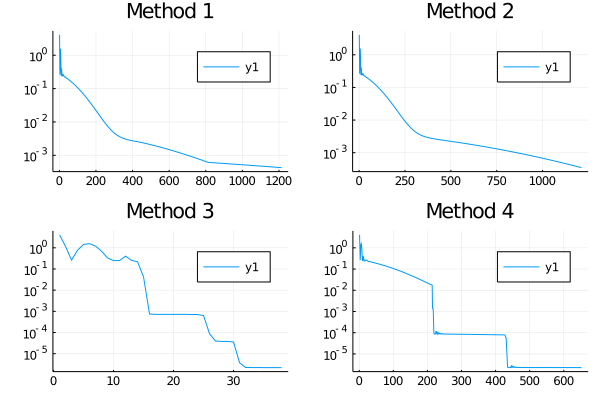

In [32]:
A=plot(losses_1, title="Method 1",yaxis=:log)
B=plot(losses_2, title="Method 2",yaxis=:log)
C=plot(losses_3, title="Method 3",yaxis=:log)
D=plot(losses_4, title="Method 4",yaxis=:log)
plot(A,B,C,D,layout=4)

## Albania

In [30]:
actual1= getCleandataFrame(country1)
para_1a,pred_value_1a,losses_1a=train_eqn2_addition_modified(country1, training_1[country1],nnp,trainer1)
para_2a,pred_value_2a,losses_2a=train_eqn2_addition_modified(country1, training_1[country1],nnp,trainer2)
para_3a,pred_value_3a,losses_3a=train_eqn2_addition_modified(country1, training_1[country1],nnp,trainer3)
para_4a,pred_value_4a,losses_4a=train_eqn2_addition_modified(country1, training_1[country1],nnp,trainer4)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[30]:2
└ @ Core In[30]:2


"Albania"

loss: 3.39: 100%|█████████████████████████████████████████| Time: 0:00:09
loss: 0.52:  22%|██████████                               |  ETA: 0:00:50

0.5202004652537355


loss: 0.428:  47%|████████████████████                     |  ETA: 0:00:34

0.4282221028406128


loss: 0.33:  72%|██████████████████████████████           |  ETA: 0:00:18

0.33041577225340407


loss: 0.241:  96%|████████████████████████████████████████ |  ETA: 0:00:02

0.2409882689709145


loss: 0.228: 100%|█████████████████████████████████████████| Time: 0:01:03
loss: 0.182:  21%|█████████                                |  ETA: 0:00:52

0.18245989153955125


loss: 0.135:  46%|███████████████████                      |  ETA: 0:00:35

0.1349705283422089


loss: 0.0978:  70%|█████████████████████████████            |  ETA: 0:00:19

0.0978421697288056


loss: 0.0694:  95%|███████████████████████████████████████  |  ETA: 0:00:03

0.0694044604577963


loss: 0.0646: 100%|█████████████████████████████████████████| Time: 0:01:01
loss: 0.0619:  20%|████████                                 |  ETA: 0:00:48

0.061907315028414775


loss: 0.0587:  44%|███████████████████                      |  ETA: 0:00:33

0.05874211719777591


loss: 0.0557:  69%|█████████████████████████████            |  ETA: 0:00:18

0.05566973305730285


loss: 0.0527:  94%|███████████████████████████████████████  |  ETA: 0:00:04

0.05271741852823599


loss: 0.052: 100%|█████████████████████████████████████████| Time: 0:00:59


"Albania"

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[30]:3
└ @ Core In[30]:3
loss: 3.39: 100%|█████████████████████████████████████████| Time: 0:00:01
loss: 0.52:   7%|███                                      |  ETA: 0:02:59

0.5202004652537355


loss: 0.428:  16%|███████                                  |  ETA: 0:02:44

0.4282221028406128


loss: 0.33:  24%|██████████                               |  ETA: 0:02:26

0.33041577225340407


loss: 0.241:  32%|██████████████                           |  ETA: 0:02:10

0.2409882689709145


loss: 0.166:  40%|█████████████████                        |  ETA: 0:01:54

0.16580207402984562


loss: 0.108:  48%|████████████████████                     |  ETA: 0:01:37

0.10784048369770836


loss: 0.0667:  57%|████████████████████████                 |  ETA: 0:01:21

0.06669300842846904


loss: 0.0396:  65%|███████████████████████████              |  ETA: 0:01:06

0.03955604127921007


loss: 0.0229:  73%|███████████████████████████████          |  ETA: 0:00:50

0.022936486983572917


loss: 0.0136:  82%|██████████████████████████████████       |  ETA: 0:00:34

0.01362561958694419


loss: 0.00877:  90%|█████████████████████████████████████    |  ETA: 0:00:19

0.00877359658031314


loss: 0.00641:  98%|█████████████████████████████████████████|  ETA: 0:00:04

0.006407769096686765


loss: 0.00607: 100%|█████████████████████████████████████████| Time: 0:03:03


"Albania"

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[30]:4
└ @ Core In[30]:4
loss: 3.39: 100%|█████████████████████████████████████████| Time: 0:00:01


"Albania"

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[30]:5
└ @ Core In[30]:5
loss: 3.39: 100%|█████████████████████████████████████████| Time: 0:00:01
loss: 0.52:  44%|███████████████████                      |  ETA: 0:00:18

0.5202004652537355


loss: 0.428:  94%|███████████████████████████████████████  |  ETA: 0:00:02

0.4282221028406128


loss: 0.415: 100%|█████████████████████████████████████████| Time: 0:00:31
loss: 0.00137:  38%|████████████████                         |  ETA: 0:00:17

0.0013717454833754427

loss: 0.00131:  88%|█████████████████████████████████████    |  ETA: 0:00:04

0.0013096298301427673


loss: 0.0013: 100%|█████████████████████████████████████████| Time: 0:00:29
loss: 4.53e-06:  20%|█████████                                |  ETA: 0:00:16

4.530063770346676e-6


loss: 4.44e-06:  69%|█████████████████████████████            |  ETA: 0:00:06

4.441434285516169e-6


loss: 4.44e-06: 100%|█████████████████████████████████████████| Time: 0:00:19


(Float32[0.22321294, -0.31623438, 0.23800781, 0.36329645, 0.25456667, 0.37133747, 0.38237998, -0.4809996, -0.07650858, -0.0014740916  …  0.28558522, -0.35215542, 0.36180803, 0.0868105, 0.18503463, -0.24004148, -0.14164543, 0.34356543, 0.2470736, 0.0108148195], Float32[0.0024, 0.00962341, 0.0022575771, -0.0013110349, -0.0016219529, -0.000350965, 0.0016031144, 0.003205135, 0.0037935516, 0.0036603387  …  0.0013399996, 0.0015899808, 0.0020493385, 0.0026346568, 0.0032632484, 0.003857775, 0.0043088966, 0.004423624, 0.0040836986, 0.0032745276], Any[37.609786435907175, 5.890885353118405, 1.6504116855782642, 10.888369541005138, 15.432012267638054, 12.112278175370534, 5.784641336858722, 1.3502821922018797, 0.8601471836409311, 3.3907749570866064  …  4.440161890101108e-6, 4.440791127031347e-6, 4.440753624490821e-6, 4.439705019190779e-6, 4.437075920800146e-6, 4.440662474992061e-6, 4.440564454760878e-6, 4.439160858665849e-6, 4.437258194989046e-6, 4.437258194989046e-6])

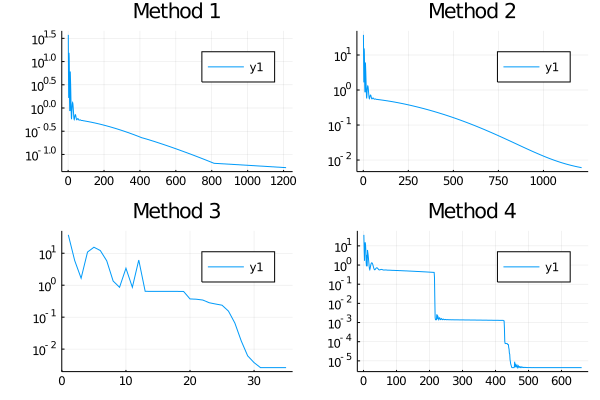

In [31]:
A=plot(losses_1a, title="Method 1",yaxis=:log)
B=plot(losses_2a, title="Method 2",yaxis=:log)
C=plot(losses_3a, title="Method 3",yaxis=:log)
D=plot(losses_4a, title="Method 4",yaxis=:log)
plot(A,B,C,D,layout=4)

## Philipines

In [35]:
actual1= getCleandataFrame(country3)
para_1b,pred_value_1b,losses_1b=train_eqn2_addition_modified(country3, training_1[country3],nnp,trainer1)
para_2b,pred_value_2b,losses_2b=train_eqn2_addition_modified(country3, training_1[country3],nnp,trainer2)
para_3b,pred_value_3b,losses_3b=train_eqn2_addition_modified(country3, training_1[country3],nnp,trainer3)
para_4b,pred_value_4b,losses_4b=train_eqn2_addition_modified(country3, training_1[country3],nnp,trainer4)

"Albania

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[35]:2
└ @ Core In[35]:2
loss: 3.37e+03:  10%|█████                                    |  ETA: 0:00:02

"

loss: 722: 100%|█████████████████████████████████████████| Time: 0:00:02
loss: 3.82:  22%|██████████                               |  ETA: 0:00:57

3.8185777504600553


loss: 0.171:  47%|████████████████████                     |  ETA: 0:00:36

0.17137641798815278


loss: 0.168:  72%|██████████████████████████████           |  ETA: 0:00:20

0.16754021181207468


loss: 0.163:  96%|████████████████████████████████████████ |  ETA: 0:00:03

0.16327338478691458


loss: 0.163: 100%|█████████████████████████████████████████| Time: 0:01:14
loss: 0.111:  21%|█████████                                |  ETA: 0:00:54

0.11084904574289917


loss: 0.0867:  46%|███████████████████                      |  ETA: 0:00:39

0.08667020996463068


loss: 0.0763:  70%|█████████████████████████████            |  ETA: 0:00:22

0.07625420999819305


loss: 0.0684:  95%|███████████████████████████████████████  |  ETA: 0:00:04

0.06839773156611421


loss: 0.0669: 100%|█████████████████████████████████████████| Time: 0:01:13
loss: 0.0658:  20%|████████                                 |  ETA: 0:00:56

0.0657518892125583


loss: 0.0645:  44%|███████████████████                      |  ETA: 0:00:43

0.06451767031748964


loss: 0.0633:  69%|█████████████████████████████            |  ETA: 0:00:24

0.06334060744555253


loss: 0.0622:  94%|███████████████████████████████████████  |  ETA: 0:00:05

0.06219758151261397


loss: 0.0619: 100%|█████████████████████████████████████████| Time: 0:01:18


"Albania"

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[35]:3
└ @ Core In[35]:3
loss: 722: 100%|█████████████████████████████████████████| Time: 0:00:02
loss: 3.82:   7%|███                                      |  ETA: 0:03:36

3.8185777504600553


loss: 0.171:  16%|███████                                  |  ETA: 0:03:02

0.17137641798815278


loss: 0.168:  24%|██████████                               |  ETA: 0:02:56

0.16754021181207468


loss: 0.163:  32%|██████████████                           |  ETA: 0:02:43

0.16327338478691458


loss: 0.159:  40%|█████████████████                        |  ETA: 0:02:23

0.15859091497798303


loss: 0.154:  48%|████████████████████                     |  ETA: 0:02:00

0.15354745910689227


loss: 0.148:  57%|████████████████████████                 |  ETA: 0:01:38

0.14821891931228728


loss: 0.143:  65%|███████████████████████████              |  ETA: 0:01:18

0.14285339535796426


loss: 0.137:  73%|███████████████████████████████          |  ETA: 0:00:59

0.1373794862219268


loss: 0.132:  82%|██████████████████████████████████       |  ETA: 0:00:41

0.13196675984999398


loss: 0.127:  90%|█████████████████████████████████████    |  ETA: 0:00:22

0.12670581995107127


loss: 0.122:  98%|█████████████████████████████████████████|  ETA: 0:00:04

0.1216234891815584


loss: 0.12: 100%|█████████████████████████████████████████| Time: 0:03:36


"Albania"

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[35]:4
└ @ Core In[35]:4
loss: 722: 100%|█████████████████████████████████████████| Time: 0:00:02


"Albania"

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[35]:5
└ @ Core In[35]:5
loss: 722: 100%|█████████████████████████████████████████| Time: 0:00:02
loss: 3.82:  44%|███████████████████                      |  ETA: 0:00:21

3.8185777504600553


loss: 0.171:  94%|███████████████████████████████████████  |  ETA: 0:00:02

0.17137641798815278


loss: 0.171: 100%|█████████████████████████████████████████| Time: 0:00:34
loss: 4.59e-05:  27%|████████████                             |  ETA: 0:00:24

4.5947626016764135e-5


loss: 4.24e-05:  76%|████████████████████████████████         |  ETA: 0:00:07

4.2358266453745505e-5


loss: 4.23e-05: 100%|█████████████████████████████████████████| Time: 0:00:29
loss: 6.35e-07:  14%|██████                                   |  ETA: 0:00:22

6.35066375274055e-7


loss: 1.71e-07:  63%|██████████████████████████               |  ETA: 0:00:09

1.7121505929684322e-7

loss: 1.71e-07:  64%|███████████████████████████              |  ETA: 0:00:08

loss: 1.71e-07: 100%|█████████████████████████████████████████| Time: 0:00:22


(Float32[0.5110299, 0.10976824, -0.18865028, 0.32704934, 0.29931265, 0.23047431, 0.24102817, 0.53256524, 0.21000402, 0.32359964  …  0.118173525, -0.32526025, -0.024847317, -0.46808538, -0.2753872, -0.53310186, -0.1931766, -0.3989846, -0.26656476, -0.009582202], Float32[0.0024, 0.0014487287, 0.0020422288, 0.002775443, 0.0026981772, 0.0021555347, 0.0019107014, 0.0018078188, 0.0017635887, 0.0018574538  …  0.002687926, 0.0027213714, 0.0027906129, 0.0028457078, 0.0029129991, 0.0030641162, 0.0033184018, 0.0036658563, 0.0040887897, 0.004572338], Any[3371.2233005089965, 2979.080913706712, 2591.287769560394, 2254.530197232902, 1934.3029584798717, 1638.0859664675634, 1372.7701869022608, 1131.9210883078451, 912.6511297319203, 721.8358377278882  …  1.5153547094800377e-7, 1.249875183005474e-7, 1.0971421089162694e-7, 1.0183498804727883e-7, 1.018061694148497e-7, 1.0140277605001566e-7, 1.0120283838013009e-7, 1.010695482625757e-7, 1.0104428094834106e-7, 1.0104428094834106e-7])

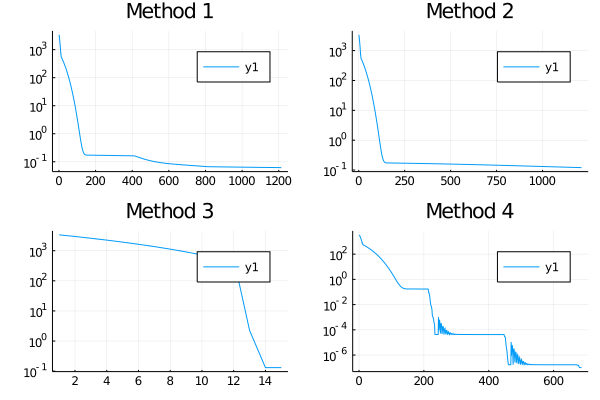

In [36]:
A=plot(losses_1b, title="Method 1",yaxis=:log)
B=plot(losses_2b, title="Method 2",yaxis=:log)
C=plot(losses_3b, title="Method 3",yaxis=:log)
D=plot(losses_4b, title="Method 4",yaxis=:log)
plot(A,B,C,D,layout=4)